<a href="https://colab.research.google.com/github/MohammedAfnanet22RVCe/crowd_count/blob/main/crowddensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload kaggle(1).json here

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv 'kaggle.json' ~/.kaggle/kaggle.json


!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tthien/shanghaitech


Dataset URL: https://www.kaggle.com/datasets/tthien/shanghaitech
License(s): unknown
 92% 306M/333M [00:05<00:00, 35.3MB/s]
100% 333M/333M [00:05<00:00, 59.3MB/s]


In [ ]:
!unzip -q shanghaitech.zip -d shanghaitech


In [ ]:
!ls -R shanghaitech


shanghaitech:
ShanghaiTech  shanghaitech_h5_empty

shanghaitech/ShanghaiTech:
part_A	part_B

shanghaitech/ShanghaiTech/part_A:
test_data  train_data

shanghaitech/ShanghaiTech/part_A/test_data:
ground-truth  images

shanghaitech/ShanghaiTech/part_A/test_data/ground-truth:
GT_IMG_100.mat	GT_IMG_134.mat	GT_IMG_168.mat	GT_IMG_36.mat  GT_IMG_6.mat
GT_IMG_101.mat	GT_IMG_135.mat	GT_IMG_169.mat	GT_IMG_37.mat  GT_IMG_70.mat
GT_IMG_102.mat	GT_IMG_136.mat	GT_IMG_16.mat	GT_IMG_38.mat  GT_IMG_71.mat
GT_IMG_103.mat	GT_IMG_137.mat	GT_IMG_170.mat	GT_IMG_39.mat  GT_IMG_72.mat
GT_IMG_104.mat	GT_IMG_138.mat	GT_IMG_171.mat	GT_IMG_3.mat   GT_IMG_73.mat
GT_IMG_105.mat	GT_IMG_139.mat	GT_IMG_172.mat	GT_IMG_40.mat  GT_IMG_74.mat
GT_IMG_106.mat	GT_IMG_13.mat	GT_IMG_173.mat	GT_IMG_41.mat  GT_IMG_75.mat
GT_IMG_107.mat	GT_IMG_140.mat	GT_IMG_174.mat	GT_IMG_42.mat  GT_IMG_76.mat
GT_IMG_108.mat	GT_IMG_141.mat	GT_IMG_175.mat	GT_IMG_43.mat  GT_IMG_77.mat
GT_IMG_109.mat	GT_IMG_142.mat	GT_IMG_176.mat	GT_IMG_44.mat  GT_I

In [ ]:
import os

for root, dirs, files in os.walk(dataset_path):
    print(root)

/kaggle/input/shanghaitech
/kaggle/input/shanghaitech/ShanghaiTech
/kaggle/input/shanghaitech/ShanghaiTech/part_B
/kaggle/input/shanghaitech/ShanghaiTech/part_B/test_data
/kaggle/input/shanghaitech/ShanghaiTech/part_B/test_data/ground-truth
/kaggle/input/shanghaitech/ShanghaiTech/part_B/test_data/images
/kaggle/input/shanghaitech/ShanghaiTech/part_B/train_data
/kaggle/input/shanghaitech/ShanghaiTech/part_B/train_data/ground-truth
/kaggle/input/shanghaitech/ShanghaiTech/part_B/train_data/images
/kaggle/input/shanghaitech/ShanghaiTech/part_A
/kaggle/input/shanghaitech/ShanghaiTech/part_A/test_data
/kaggle/input/shanghaitech/ShanghaiTech/part_A/test_data/ground-truth
/kaggle/input/shanghaitech/ShanghaiTech/part_A/test_data/images
/kaggle/input/shanghaitech/ShanghaiTech/part_A/train_data
/kaggle/input/shanghaitech/ShanghaiTech/part_A/train_data/ground-truth
/kaggle/input/shanghaitech/ShanghaiTech/part_A/train_data/images
/kaggle/input/shanghaitech/shanghaitech_h5_empty
/kaggle/input/shangh

In [ ]:
import os

# PART_B_TRAIN_IMG = "/root/.cache/kagglehub/datasets/tthien/shanghaitech/versions/1/ShanghaiTech/part_B/train_data/images"
# PART_B_TRAIN_GT = "/root/.cache/kagglehub/datasets/tthien/shanghaitech/versions/1/ShanghaiTech/part_B/train_data/ground-truth"
PART_B_TRAIN_IMG = "/content/shanghaitech/ShanghaiTech/part_B/train_data/images"
PART_B_TRAIN_GT  = "/content/shanghaitech/ShanghaiTech/part_B/train_data/ground-truth"


In [ ]:
import cv2
import numpy as np
import h5py
from tqdm import tqdm
from glob import glob

from scipy.io import loadmat

import os
import cv2
import scipy.io
import numpy as np

def load_data(img_dir, gt_dir):
    X, y = [], []
    img_files = os.listdir(img_dir)
    img_files.sort()

    for img_file in img_files:
        img_path = os.path.join(img_dir, img_file)
        mat_file = f"GT_{img_file.split('.')[0]}.mat"
        mat_path = os.path.join(gt_dir, mat_file)

        if not os.path.exists(mat_path):
            print(f"Skipping {img_file}: no corresponding .mat file")
            continue

        # Load image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Skipping {img_file}: could not load image")
            continue

        X.append(img)

        # Load annotation count
        mat = scipy.io.loadmat(mat_path)
        annPoints = mat["image_info"][0][0][0][0][0]
        y.append(len(annPoints))  # Count of people

    return np.array(X), np.array(y)



In [ ]:
from sklearn.model_selection import train_test_split
X_train, y_train = load_data(PART_B_TRAIN_IMG, PART_B_TRAIN_GT)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Step 1: Load actual data (assuming you defined load_data() earlier)
X_all, y_all = load_data(PART_B_TRAIN_IMG, PART_B_TRAIN_GT)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

# Step 3: Resize images to (995, 421)
X_train_resized = tf.image.resize(X_train, [995, 421])
X_test_resized = tf.image.resize(X_test, [995, 421])



In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(995, 421, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)  # Output: crowd count
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 995, 421, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 993, 419, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 496, 209, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 494, 207, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 247, 103, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 245, 101, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 122, 50, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 390400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    49,971,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,995,041 (190.72 MB)

 Trainable params: 49,995,041 (190.72 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Convert resized tensors to NumPy arrays (required by model.fit)
X_train_resized = tf.image.resize(X_train, [995, 421]).numpy()

# Train the model
model.fit(X_train_resized, y_train, epochs=100, batch_size=4, validation_split=0.2)


Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - loss: 9560.3809 - mae: 72.9137 - val_loss: 13906.0000 - val_mae: 74.2433
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 6906.4946 - mae: 60.0694 - val_loss: 12188.3301 - val_mae: 76.9516
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 3958.0955 - mae: 50.6852 - val_loss: 9627.2783 - val_mae: 65.4910
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 1355.9009 - mae: 27.9925 - val_loss: 9931.6045 - val_mae: 62.3963
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 496.9219 - mae: 17.3394 - val_loss: 9397.9258 - val_mae: 64.4604
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 307.2709 - mae: 13.7930 - val_loss: 10591.5049 - val_mae: 62.1014
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 119.5344 - mae: 8.3053 - val_loss: 9971.0293 - val_mae: 62.5029
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 157.5593 - mae: 9.3219 - val_loss: 11213.8379 - val_mae: 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


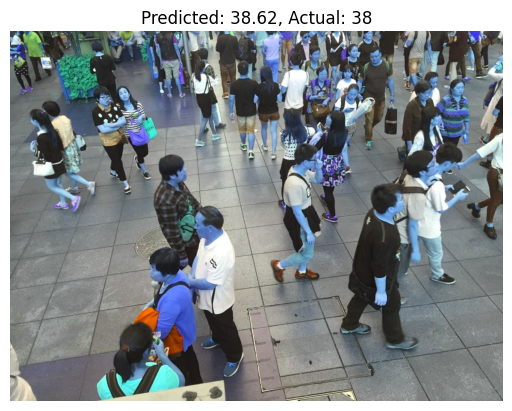

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Pick one test image
img = X_train[2]
true_count = y_train[2]

# Resize image to model input size
img_resized = tf.image.resize(img, [995, 421]).numpy()

# Predict crowd count
pred_count = model.predict(img_resized.reshape(1, 995, 421, 3))[0][0]

# Show original image (optional: resize for display only)
plt.imshow(img.astype('uint8'))  # or `img_resized.astype('uint8')` if you prefer
plt.title(f"Predicted: {pred_count:.2f}, Actual: {true_count}")
plt.axis("off")
plt.show()



In [ ]:
# Save entire model (architecture + weights + optimizer state)
model.save("resized_model_small.h5")


In [ ]:
from google.colab import files
files.download('resized_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload kaggle(1).json here

Saving IMG20250614104238.jpg to IMG20250614104238.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


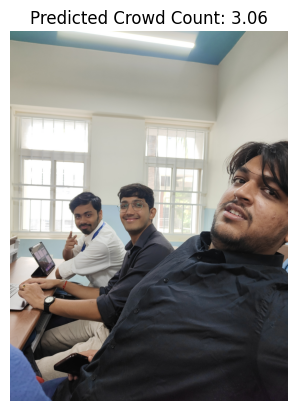

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from PIL import Image

# Load uploaded image
image_path = 'IMG20250614104238.jpg'  # Use the exact filename you uploaded
img = Image.open(image_path).convert('RGB')

# Resize to model input size (995, 421)
img_resized = img.resize((421, 995))  # (width, height)

# Convert to numpy and normalize
img_array = np.array(img_resized).astype('float32') / 255.0

# Add batch dimension
input_tensor = np.expand_dims(img_array, axis=0)  # Shape: (1, 995, 421, 3)

# Predict
pred_count = (model.predict(input_tensor)[0][0])

# Show result
plt.imshow(img)
plt.title(f"Predicted Crowd Count: {pred_count/10:.2f}")
plt.axis("off")
plt.show()
